## Scaled visualization



## Decomposed - FacetCNV





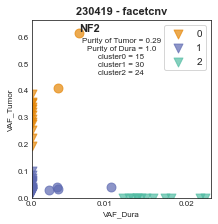

In [53]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


def visualization_decomposition( df, OUTPUT_SUPTITLE, ax ):
    ax.set_title(OUTPUT_SUPTITLE, fontsize = 11, fontweight='bold')
    #ax.text(0.5, 0.9, "Purity of Tumor = {}\nPurity of Dura = {}".format(df[df['sample_id'].str.contains('Tumor')].iloc[0]["tumour_content"], df[df['sample_id'].str.contains('Dura')].iloc[0]["tumour_content"] ), ha='center', fontsize = 14 )
    ax.set_xlabel("VAF_Dura", fontdict = {"fontsize" : 8})
    ax.set_ylabel("VAF_Tumor", fontdict = {"fontsize" : 8})
    ax.tick_params( axis = 'x', labelsize = 8, pad = -1 )
    ax.tick_params( axis = 'y', labelsize = 8, pad = -1 )
    sns.set_style("white") 

    vaf_Tumor_list = []
    vaf_Dura_list = []

    tabl = palettable.tableau.Tableau_20.mpl_colors
    vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    colorlist = [i for i in vivid_10]
    shapelist = ["o", "s", "^", "v", ">", "<"]

    
    df[ ["CHR", "POS", "ALT", "REF"] ] = df["mutation_id"].str.split("_", expand = True)
    df["CHR"] = pd.Categorical(df["CHR"], 
                                                categories = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chr22", "chrX", "chrY"], 
                                                ordered=True)
    df = df.sort_values (by = ['cluster_id', 'CHR', 'POS'], axis = 0).drop (["CHR", "POS"], axis = 1).reset_index(drop = True)

    df_count = np.unique ( df ["cluster_id"], return_counts = True )

    k = 0
    set_cluster_id = set([])

    while k < df.shape[0] - 1:
        if df.iloc[k]["mutation_id"] == df.iloc[k + 1]["mutation_id"]:       # 2-shared mutation인 경우
            vaf_Dura = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 5 )
            vaf_Tumor = round ( int (df.iloc[k + 1]["alt_counts"]) / ( int (df.iloc[k + 1]["ref_counts"]) +  int (df.iloc[k + 1 ]["alt_counts"])) , 5 )
            i = 3 if ( (int (df.iloc[k]["alt_counts"]) == 0) | ( int (df.iloc[k + 1]["alt_counts"]) == 0)) else 0
            k2 = k + 2
        else:
            i = 3
            if "Dura" in df.iloc[k]["sample_id"]:
                vaf_Tumor = 0
                vaf_Dura = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 5 )
            elif "Tumor" in df.iloc[k]["sample_id"]:
                vaf_Tumor = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 5 )
                vaf_Dura = 0
            k2 = k + 1
            
        #print ( vaf_Dura, pow (10, 5 * vaf_Dura ) - 1 )
        ax.scatter ( pow ( 10, 5 * vaf_Dura  ) - 1 , vaf_Tumor,  alpha = 0.7, s = 80, 
                        color = colorlist [ df.iloc[k]["cluster_id"]], 
                        marker = shapelist[i], 
                        label = "{}".format ( df.iloc [k]["cluster_id"]) )
        
        if df.iloc[k]["gene"] in ["NF2", "AKT1", "KLF4", "TRAF7"]:
            ax.text ( pow (10, 5 * vaf_Dura ) - 1, vaf_Tumor, df.iloc[k]["gene"],   ha = "left", va = "bottom", fontdict = {"fontsize": 11, "fontweight" : "bold", "fontstyle": "italic"} )

        vaf_Tumor_list.append (vaf_Tumor)
        vaf_Dura_list.append (vaf_Dura)
        set_cluster_id.add ( df.iloc[k]["cluster_id"]  )

        k = k2
    
    legend_without_duplicate_labels ( ax )
    
    ax.set_xticks ( [ pow (10, 5 * i) - 1 for i in xtick ]) 
    ax.set_xticklabels ( xtick ) 
    
    ax.set_xlim([0,  0.3 ])
    ax.set_ylim([0,  0.66])
    ax.text( ax.get_xlim()[1] / 2 , ax.get_ylim()[1] / 1.2, "Purity of Tumor = {}\nPurity of Dura = {}".format(df[df['sample_id'].str.contains('Tumor')].iloc[0]["tumour_content"], df[df['sample_id'].str.contains('Dura')].iloc[0]["tumour_content"] ), ha='center', fontsize = 8 )

    for i in range ( len(df_count[0]) ) :
        ax.text( ax.get_xlim()[1] / 2, ax.get_ylim()[1] / 1.2 - 0.03* (i + 1), "cluster{} = {}".format( df_count[0][i], int(df_count[1][i] / 2)  ), ha = 'center', fontsize = 8 )


    print ("\n\n")
    
    return df, ax
        
        


import pandas as pd
import matplotlib.pyplot as plt
import palettable, argparse, math
import numpy as np
import seaborn as sns



#Sample_ID, xtick = "230405_2", np.arange (0, 0.08, 0.02) 
Sample_ID, xtick = "230419", np.arange (0, 0.021, 0.01)
global Sample_ID, xtick

FACETCNV_TO_PYCLONEVI_MATRIX_PATH = "/data/project/Meningioma/31.Clonality/01.make_matrix/" + str(Sample_ID) + "/" + str(Sample_ID) + ".facetcnv_to_pyclonevi.tsv"
FACETCNV_TO_PYCLONEVI_OUTPUT_PATH = "/data/project/Meningioma/31.Clonality/02.pyclonevi/" + str(Sample_ID) + "/" + str(Sample_ID) + ".facetcnv_to_pyclonevi.tsv"
OUTPUT_PATH_SHARED = "/data/project/Meningioma/31.Clonality/02.pyclonevi/" + str(Sample_ID) + "/" + str(Sample_ID) + ".decomposed.pdf"
OUTPUT_PATH_TOTAL = "/data/project/Meningioma/31.Clonality/02.pyclonevi/" + str(Sample_ID) + "/" + str(Sample_ID) + ".total.pdf"


df_facet_to_pycl = pd.read_csv (FACETCNV_TO_PYCLONEVI_OUTPUT_PATH, sep = "\t")
df_facet_to_pycl = df_facet_to_pycl.drop_duplicates (['mutation_id'], keep = 'first').sort_values ( ['mutation_id'], axis = 0, ascending = True)[ [ "mutation_id", "cluster_id"] ].reset_index().drop ('index', axis = 1)
df_facet_matrix = pd.read_csv (FACETCNV_TO_PYCLONEVI_MATRIX_PATH, sep = "\t")



# FacetCNV visualization
fig, ax = plt.subplots( figsize=(3, 3), nrows = 1, ncols = 1 )
fig.subplots_adjust (wspace = 0.15, hspace = 0.1, bottom = 0.10, top = 0.92, left = 0.15, right = 0.98)
df_facet_integrated = pd.merge (df_facet_matrix, df_facet_to_pycl, left_on = "mutation_id", right_on = "mutation_id")
print ("\n\n## Decomposed - FacetCNV")
df, ax = visualization_decomposition ( df_facet_integrated, "{} - facetcnv".format(Sample_ID), ax )
fig.savefig ( OUTPUT_PATH_SHARED.replace (".pdf", "-facetcnv.scaled.pdf") )
# df.to_csv ( OUTPUT_PATH_SHARED.replace (".pdf", "-facetcnv.tsv"), sep = "\t", index = False)


In [4]:
import pandas as pd
import numpy as np
import argparse
import warnings
warnings.simplefilter (action = 'ignore')


INPUT_TSV="/data/project/Meningioma/31.Clonality/02.pyclonevi/230405_2/230405_2.facetcnv_to_pyclonevi.tsv"
OUTPUT_TSV="/data/project/Meningioma/31.Clonality/02.pyclonevi/230405_2/230405_2.facetcnv_to_pyclonevi.tsv"


df = pd.read_csv ( INPUT_TSV, sep = "\t")
df["axis"] = df["sample_id"].str.split ("_").str[-1]

df2 = pd.DataFrame ( df.groupby( ["cluster_id", "axis"])["cellular_prevalence"].mean() ).unstack(fill_value=0).reset_index()

df2

cluster_id cellular_prevalence        
axis                           Dura   Tumor
0             0              0.0182  0.2473
1             1              0.0374  0.0003
2             2              0.0412  0.9394

In [ ]:

samplename_list = []
for i in range (1, len(df2.columns) ):
    samplename_list.append ( df2.columns[i][1] )
df2.columns = ["cluster_id"] + samplename_list

df2 = df2.sort_values(by = ["Tumor", "Dura"], ascending=False).reset_index()
df2["index"] = df2.index

# 새로운 index를 부여하기 위해서 merge함
new_df = pd.merge (df, df2, left_on  = "cluster_id", right_on= "cluster_id", how='left')
selected_columns = [col for col in new_df.columns if col not in ["cluster_id"] + samplename_list ]
new_df = new_df [selected_columns]

# 새로운 index를 cluster_df로 바꿔줌
new_df.rename(columns = {"index":"cluster_id" }, inplace = True)
new_df = new_df.sort_values(by = ["cluster_id", "mutation_id"], ascending=True).reset_index ( drop = True)

new_df.to_csv (OUTPUT_TSV, sep = "\t", index = False)
print (new_df)